In [1]:
from imports import *

c:\Users\Tekva\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = 'cleaned_df.xlsx'
df = pd.read_excel(file_path)
df.head()

,Irritation,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,fr_aryl_methyl,fr_bicyclic,fr_ester,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_pyridine,fr_sulfonamd,fr_urea
0,1,-0.156202,0.917365,1.215465,0.378529,0.466241,0.209837,0.232062,0.536511,0.303403,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0.133787,0.361076,0.384876,0.713980,0.694891,0.375455,0.234795,0.536740,0.303088,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,1,-2.006071,0.000000,1.841560,0.417235,0.459854,0.277571,0.130574,0.724242,0.000000,...,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0
3,1,-0.535903,0.607914,0.648805,0.619348,0.650299,0.287167,0.165618,0.464030,0.396366,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,-1.577659,0.927894,1.240141,0.480844,0.000000,0.250357,0.112937,0.724242,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Irritation'])  # Assuming 'Call' is the target variable
y = df['Irritation']

## Random Forest Feature Selection

In [51]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 10 important features
selected_features = feature_importances.index[:10]
print("Selected Features:", selected_features)

# Keep only important features
X_selected = X[selected_features]

Selected Features: Index(['HallKierAlpha', 'MaxAbsEStateIndex', 'AvgIpc', 'BertzCT', 'MolWt',
       'NOCount', 'MinAbsPartialCharge', 'TPSA', 'VSA_EState2', 'PEOE_VSA10'],
      dtype='object')


In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression()

# Apply RFE (select top 10 features)
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['MinAbsEStateIndex', 'HallKierAlpha', 'Ipc', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'SMR_VSA6', 'VSA_EState5', 'NumHAcceptors',
       'fr_pyridine'],
      dtype='object')


In [36]:
def find_best_num_features(X_train, y_train, X_test, y_test, model, max_features=100):  
    validation_accuracies = []
    train_accuracies = []

    # Train a Logistic Regression model
    model = LogisticRegression()

    for num_features in range(1, max_features + 1):
        rfe = RFE(model, n_features_to_select=num_features)
        X_selected = rfe.fit_transform(X, y)

        selected_features = X.columns[rfe.support_]
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # Clone the model to prevent modifying the original instance
        model_copy = clone(model)
        model_copy.fit(X_train_selected, y_train)

        y_pred = model_copy.predict(X_test_selected)
        y_pred_train = model_copy.predict(X_train_selected)
        accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        validation_accuracies.append(accuracy)
        train_accuracies.append(train_accuracy)

    plt.plot(range(1, max_features + 1), validation_accuracies, marker='o')
    #plt.plot(range(1, max_features + 1), train_accuracies, marker='o', color = "red")
    plt.xlabel("Number of Features")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy vs. Number of Features")
    plt.show()

    optimal_num_features = np.argmax(validation_accuracies) + 1
    print(f"Optimal number of features: {optimal_num_features}")


    rfe = RFE(model, n_features_to_select=optimal_num_features)
    X_selected = rfe.fit_transform(X, y)

    selected_features = X.columns[rfe.support_]
    X_train_optimal = X_train[selected_features]
    X_test_optimal = X_test[selected_features]

    return X_train_optimal, X_test_optimal


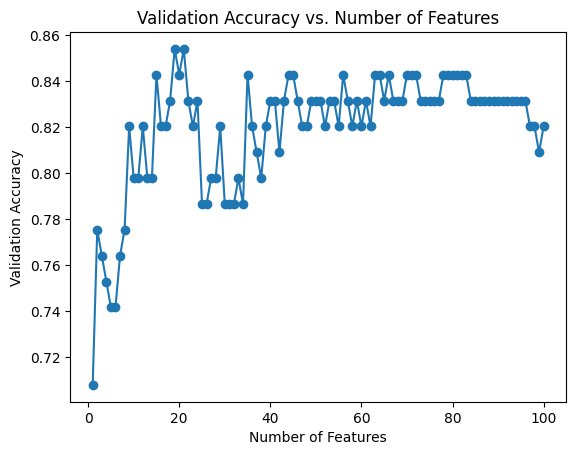

Optimal number of features: 19


,MinAbsEStateIndex,SPS,FpDensityMorgan1,HallKierAlpha,Ipc,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,SMR_VSA1,SMR_VSA6,TPSA,EState_VSA5,VSA_EState10,VSA_EState5,NumHAcceptors,fr_C_O,fr_alkyl_halide,fr_pyridine
324,0.401211,0.771290,0.510025,0.367876,0.543279,0.270069,0.647777,0.000000,0.000000,0.360092,0.591384,0.545882,0.636327,0.529372,0.414080,0.375000,0.5,0.000000,0.000000
151,0.448634,0.000000,0.740602,0.540587,0.084351,0.240611,0.599258,0.000000,0.000000,0.238617,0.000000,0.205919,0.527298,0.455693,0.703792,0.250000,0.5,0.000000,0.000000
55,0.000000,0.471645,0.674089,0.595855,0.061710,0.240611,0.607148,0.000000,0.000000,0.118587,0.466119,0.173191,0.000000,0.788050,0.622963,0.250000,0.0,0.178587,0.204632
112,0.721650,0.000000,0.394737,0.620035,0.018851,0.000000,0.608926,0.000000,0.000000,0.120031,0.000000,0.133652,0.377964,0.455693,0.767083,0.125000,0.5,0.000000,0.000000
125,0.000000,0.204380,0.495614,0.956284,0.004943,0.713844,0.000000,0.000000,0.000000,0.000000,0.000000,0.494754,0.000000,0.455693,0.600000,0.375000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.000000,0.281022,0.319079,0.480138,0.010123,0.000000,0.000000,0.000000,0.000000,0.769934,0.000000,0.000000,0.000000,0.455693,0.600000,0.250000,1.0,0.000000,0.000000
201,0.370854,0.656166,0.490305,0.652850,0.268278,0.940795,0.580171,0.000000,0.000000,0.703737,0.915604,0.556373,0.562470,0.809683,0.236896,1.000000,1.0,0.000000,0.000000
289,0.347279,0.745281,0.457350,0.164076,0.002744,0.515797,0.650845,0.810232,0.707107,0.790706,0.449331,0.396884,0.000000,0.455693,0.960000,0.375000,0.5,0.707107,0.000000
255,0.000000,0.504562,0.224507,0.098446,0.000000,0.000000,0.858637,0.000000,0.000000,0.000000,0.932238,0.000000,0.000000,0.455693,0.146726,0.000000,0.5,0.000000,0.000000


In [38]:
# Example usage
X_train_selected, X_test_selected = find_best_num_features(X_train, y_train, X_test, y_test, xgb_model)
X_train_selected

## Lasso

In [54]:
from sklearn.linear_model import Lasso
import numpy as np

# Train a Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Get important features (non-zero coefficients)
important_features = X.columns[np.abs(lasso.coef_) > 0]
print("Selected Features:", (important_features))


Selected Features: Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'SPS',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'Ipc', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA3', 'PEOE_VSA9', 'SMR_VSA6', 'SlogP_VSA1',
       'TPSA', 'EState_VSA2', 'EState_VSA5', 'EState_VSA6', 'EState_VSA8',
       'VSA_EState5', 'NHOHCount', 'NumAromaticRings', 'fr_C_O'],
      dtype='object')


## SHAP Feature Selection

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 108)
Shape of X_test: (89, 108)
Shape of y_train: (353,)
Shape of y_test: (89,)


In [6]:
def xgboost(X_train, y_train, X_test, y_test):
    # Instantiate the XGBoost classifier
    xgb_model = xgb.XGBClassifier(objective='binary:logistic')

    # Perform cross-validation with 5 folds and accuracy scoring
    cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

    # Print cross-validation results
    print("Cross-validation results:")
    print(cv_results)
    print("Average Accuracy:", cv_results.mean())

    # Fit the model on the entire training dataset
    xgb_model.fit(X_train, y_train)

    # Evaluate accuracy on test data
    test_accuracy = xgb_model.score(X_test, y_test)
    train_accuracy = xgb_model.score(X_train, y_train)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    return xgb_model

In [7]:
def random_forest(X_train, y_train, X_test, y_test):
    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier()

    # Cross-validation
    cv_results = cross_val_score(rf, X_train, y_train, cv=5)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return rf

In [8]:
def decision_tree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier()
    
    # Cross-validation
    cv_results = cross_val_score(dt, X_train, y_train, cv = 5)
    dt.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return dt
    

In [9]:
def k_neigbhors(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier()

    cv_results = cross_val_score(knn, X_train, y_train, cv=5)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return knn

In [10]:
def Support_vector_machine(X_train, y_train, X_test, y_test):
    svm= SVC()

    cv_results = cross_val_score(svm, X_train, y_train, cv=5)
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = svm.predict(X_test)
    y_pred_train = svm.predict(X_train)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Print the results
    print("Cross-validation results:", cv_results)
    print(f"Average Accuracy: {np.mean(cv_results)}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return svm

In [33]:
print("XGBoost:")
xgb_model = xgboost(X_train, y_train, X_test, y_test)
print("\nRandom forest:")
rf_model = random_forest(X_train, y_train, X_test, y_test)
print("\nDecision tree:")
dt_model = decision_tree(X_train, y_train, X_test, y_test)
print("\nKNN:")
knn_model = k_neigbhors(X_train, y_train, X_test, y_test)
print("\nSVM")
svm_model = Support_vector_machine(X_train, y_train, X_test, y_test)

XGBoost:
Cross-validation results:
[0.8028169  0.81690141 0.78873239 0.85714286 0.84285714]
Average Accuracy: 0.8216901408450704
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.898876404494382

Random forest:
Cross-validation results: [0.85915493 0.83098592 0.88732394 0.88571429 0.84285714]
Average Accuracy: 0.8612072434607645
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.9101123595505618

Decision tree:
Cross-validation results: [0.71830986 0.81690141 0.71830986 0.74285714 0.71428571]
Average Accuracy: 0.7421327967806841
Train Accuracy: 0.9943342776203966
Test Accuracy: 0.8426966292134831

KNN:
Cross-validation results: [0.74647887 0.77464789 0.73239437 0.74285714 0.81428571]
Average Accuracy: 0.7621327967806841
Train Accuracy: 0.8413597733711048
Test Accuracy: 0.8426966292134831

SVM
Cross-validation results: [0.81690141 0.77464789 0.8028169  0.8        0.84285714]
Average Accuracy: 0.8074446680080483
Train Accuracy: 0.9008498583569405
Test Accuracy: 0.8089887640449438


In [12]:
def xgboost_sort_features(model, X_train):
     # Create SHAP explainer and calculate SHAP values
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_train)

    # Calculate feature importance (mean absolute SHAP values)
    feature_importance = np.abs(shap_values).mean(0)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order of importance
    return sorted_idx

In [13]:
def tree_sort_features(model, X_train):       
    #  Create SHAP explainer for Random Forest
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)  # Shape: (samples, features, 2)

    # Compute SHAP difference (Class 1 - Class 0) and take mean absolute values
    shap_values_diff = shap_values[:, :, 1] - shap_values[:, :, 0]
    feature_importance = np.abs(shap_values_diff).mean(axis=0)  # Shape: (features,)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]
    return sorted_idx

In [14]:
def kernel_sort_features(model, X_train):
    # Create SHAP KernelExplainer (use a small sample for efficiency)
    explainer = shap.KernelExplainer(model.predict, X_train.sample(50))  # Sampling speeds up computation
    shap_values = explainer.shap_values(X_train)

    # Convert to NumPy array if not already
    shap_values = np.array(shap_values)  # Shape: (samples, features)

    # Compute feature importance (mean absolute SHAP values)
    feature_importance = np.abs(shap_values).mean(axis=0)  # Shape: (features,)

    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)[::-1]  # Descending order
    return sorted_idx

In [15]:
def find_best_num_features(X_train, y_train, X_test, y_test, model, max_features=100):
    #sorted_idx = xgboost_sort_features(model, X_train)
    sorted_idx = tree_sort_features(model, X_train)
    #sorted_idx = kernel_sort_features(model, X_train)
    
    validation_accuracies = []
    train_accuracies = []

    for num_features in range(1, max_features + 1):
        selected_features = X_train.columns[sorted_idx[:num_features]]
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # Clone the model to prevent modifying the original instance
        model_copy = clone(model)
        model_copy.fit(X_train_selected, y_train)

        y_pred = model_copy.predict(X_test_selected)
        y_pred_train = model_copy.predict(X_train_selected)
        accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        validation_accuracies.append(accuracy)
        train_accuracies.append(train_accuracy)

    plt.plot(range(1, max_features + 1), validation_accuracies, marker='o')
    #plt.plot(range(1, max_features + 1), train_accuracies, marker='o', color = "red")
    plt.xlabel("Number of Features")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy vs. Number of Features")
    plt.show()

    optimal_num_features = np.argmax(validation_accuracies) + 1
    print(f"Optimal number of features: {optimal_num_features}")

    selected_features = X_train.columns[sorted_idx[:optimal_num_features]]
    X_train_optimal = X_train[selected_features]
    X_test_optimal = X_test[selected_features]

    return X_train_optimal, X_test_optimal


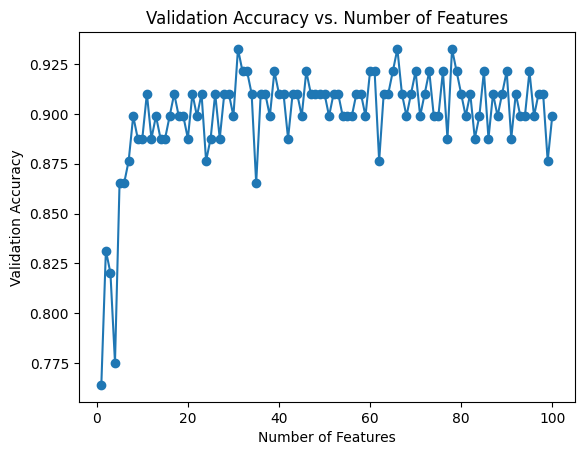

Optimal number of features: 31


,HallKierAlpha,MaxAbsEStateIndex,AvgIpc,BertzCT,PEOE_VSA1,PEOE_VSA9,TPSA,MolWt,EState_VSA2,SPS,...,MaxPartialCharge,SMR_VSA1,SlogP_VSA2,VSA_EState2,SMR_VSA6,EState_VSA6,FpDensityMorgan3,PEOE_VSA11,qed,VSA_EState5
324,0.367876,0.889898,0.708170,0.703124,0.270069,0.444212,0.545882,0.606737,0.654399,0.771290,...,0.423977,0.360092,0.711190,0.058578,0.591384,0.775181,0.180631,0.000000,0.893775,0.414080
151,0.540587,0.293790,0.545197,0.455411,0.240611,0.000000,0.205919,0.360711,0.520714,0.000000,...,0.391819,0.238617,0.232083,0.329561,0.000000,0.000000,1.094249,0.000000,0.498889,0.703792
55,0.595855,-1.275665,0.555119,0.488783,0.240611,0.805130,0.173191,0.408168,0.539212,0.471645,...,0.239110,0.118587,0.242582,0.145723,0.466119,0.759892,0.805333,0.000000,0.745384,0.622963
112,0.620035,0.105217,0.455127,0.237451,0.000000,0.000000,0.133652,0.180356,0.000000,0.000000,...,0.243331,0.120031,0.116003,0.316852,0.000000,0.000000,-0.664605,0.000000,0.439413,0.767083
125,0.956284,-0.569979,0.219050,0.162019,0.713844,0.000000,0.494754,0.224308,0.000000,0.204380,...,0.127848,0.000000,0.183941,0.496274,0.000000,0.000000,-1.575234,0.000000,0.269826,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.480138,-0.386181,0.367469,0.244784,0.000000,0.000000,0.000000,0.231661,0.506618,0.281022,...,0.489232,0.769934,0.664015,0.527990,0.000000,0.000000,-1.729273,0.000000,0.322963,0.600000
201,0.652850,0.678288,0.642678,0.530697,0.940795,0.825363,0.556373,0.607091,0.678323,0.656166,...,0.406670,0.703737,0.895045,0.666666,0.915604,0.775181,-0.205815,0.000000,0.463960,0.236896
289,0.164076,2.059744,0.937196,0.866615,0.515797,0.780270,0.396884,0.757767,0.666316,0.745281,...,0.491303,0.790706,0.368066,0.504062,0.449331,0.208314,0.484431,0.810232,0.304830,0.960000
255,0.098446,0.707103,0.750082,0.899174,0.000000,0.000000,0.000000,0.831268,0.000000,0.504562,...,0.127848,0.000000,0.000000,0.792549,0.932238,0.000000,-1.386309,0.000000,0.314979,0.146726


In [16]:
# Example usage
X_train_selected, X_test_selected = find_best_num_features(X_train, y_train, X_test, y_test, rf_model)
X_train_selected

## Save Selected Features

In [48]:
selected_features = list(X_train_selected.columns)
selected_features

['MinAbsEStateIndex',
 'SPS',
 'FpDensityMorgan1',
 'HallKierAlpha',
 'Ipc',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'SMR_VSA1',
 'SMR_VSA6',
 'TPSA',
 'EState_VSA5',
 'VSA_EState10',
 'VSA_EState5',
 'NumHAcceptors',
 'fr_C_O',
 'fr_alkyl_halide',
 'fr_pyridine']

In [47]:
df_selected = pd.DataFrame(selected_features, columns=["Selected Features"])
df_selected


,Selected Features
0,MinAbsEStateIndex
1,SPS
2,FpDensityMorgan1
3,HallKierAlpha
4,Ipc
5,PEOE_VSA1
6,PEOE_VSA10
7,PEOE_VSA11
8,PEOE_VSA12
9,SMR_VSA1


In [40]:
selected_features = list(X_train_selected.columns)

# Convert to DataFrame
df_selected = pd.DataFrame(selected_features, columns=["Selected Features"])

# Export to Excel
df_selected.to_excel("Features/selected_features_RF_XGB.xlsx", index=False)

In [50]:

# Combine the target class (y) and selected features (X_selected) into a new DataFrame
df_selected = pd.concat([X_train_selected, y], axis=1)
# Export to Excel
df_selected.to_excel("Features/selected_features_RF_XGB.xlsx", index=False)